# K-means 군집 알고리즘

군집은 유사도가 높은 객체로 이루어진 그룹을 찾는 기법이다.  
K-means는 다음과 같은 개념을 사용한다.
* 군집 중앙은 해당 군집에 속하는 모든 점의 산술 평균이다.
* 각 점은 다른 군집의 중앙보다 자신이 속한 군집의 중앙에 더 가깝다.(유사도 거리)

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

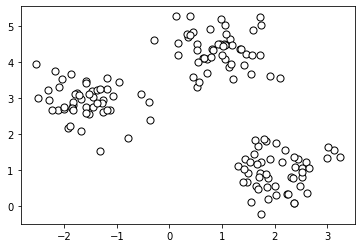

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)

plt.show()

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)
y_km

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

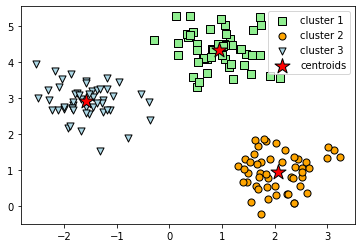

In [4]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)

plt.show()

# 적정 군집수 판단
K Means를 수행하기전에는 클러스터의 개수를 명시적으로 지정해줘야 한다. 몇개의 클러스터의 수가 가장 적절할지는 어떻게 결정할 수 있을까? Inertia value 라는 값을 보면 적정 클러스터 수를 선택할 수 있다. Inertia value는 군집화가된 후에, 각 중심점에서 군집의 데이타간의 거리를 합산한것이으로 군집의 응집도를 나타내는 값이다, 이 값이 작을 수록 응집도가 높게 군집화가 잘되었다고 평가할 수 있다.

다음은 위의 데이터로 1~6개의 클러스터로 클러스터링을 했을때, 각 클러스터 개수별로 inertia value를 출력해보는 코드이다.

In [5]:
ks = range(2,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

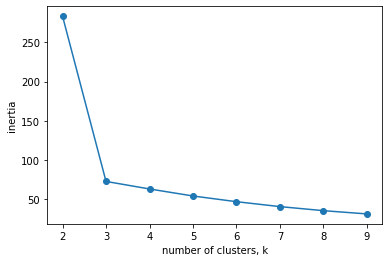

In [6]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')

plt.show()

# Iris dataset 으로 K-means 실습

In [7]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [8]:
iris = datasets.load_iris()

In [9]:
X = iris.data[:, :2]
y = iris.target

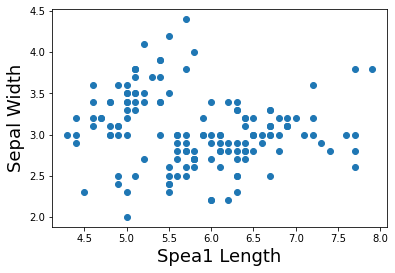

In [10]:
# iris data 산점도를 그려 확인한다.
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.show()

In [11]:
# iris data를 3개로 군집한다.
km = KMeans(n_clusters = 3, random_state=21)
km.fit(X)

KMeans(n_clusters=3, random_state=21)

In [12]:
# 중심점의 위치
centers = km.cluster_centers_
print(centers)

[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


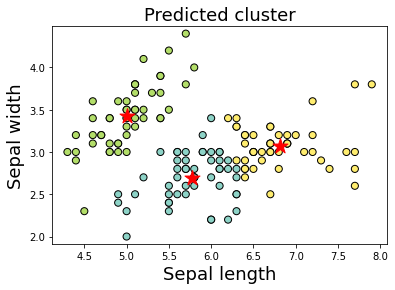

In [29]:
# 군집에 의해 분류된 class 정보
new_labels = km.labels_

# 산점도를 그려 군집을 확인
fig, axes = plt.subplots(1)
axes.axis('equal')
axes.scatter(X[:, 0], X[:, 1], c=new_labels, cmap='Set3',
edgecolor='k', s=50)

axes.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=250)
axes.set_xlabel('Sepal length', fontsize=18)
axes.set_ylabel('Sepal width', fontsize=18)

axes.set_title('Predicted cluster', fontsize=18)
plt.show()

# 군집 모형의 평가

clustering 알고리즘은 비지도 학습 알고리즘이다. 따라서 타겟 label이 없으므로 예측과 정답을 비교하는 방식으로 모형을 평가하기 어렵다.   
그러나 군집 자체의 특성를 평가할 수는 있다.  
클러스터 내의 샘플간의 거리는 가깝고 (즉, 조밀한 클러스터) 클러스터 간 거리는 먼 것 (즉, 잘 구분된 클러스터)이 좋은 클러스터라고 직관적으로 생각할 수 있다. 

* 실루엣 계수(silhouette score) : 실루엣 계수는 한 클러스터 안에 데이터들이 다른 클러스터와 비교해서 얼마나 비슷한가를 나타낸다.
* 실루엣은 -1~1사이의 값을 가지며 **1에 가까울수록 잘 구분되는 클러스터를 의미한다.**
* 사이킷런의 silhouette_score 함수는 모든 샘플의 실루엣 계수를 평균한 값이다.

$$s_i={(b_i - a_i) \over max(a_i, b_i)}$$

* $s_i$ : 샘플 i의 실루엣 계수
* $a_i$ : 샘플 i와 같은 클래스 안에 있는 모든 다른 샘플 사이의 평균 거리
* $b_i$ : 샘플 i와 가장 가까운 다른 클러스터 안에 있는 샘플 사이의 평균 거리

In [14]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 특성 행렬을 생성합니다.
features, _ = make_blobs(n_samples = 1000,
                         n_features = 10,
                         centers = 2,
                         cluster_std = 0.5,
                         shuffle = True,
                         random_state = 1)

# k-평균을 사용하여 데이터를 클러스터링하고 클래스를 예측합니다.
model = KMeans(n_clusters=2, random_state=1).fit(features)

# 예측된 클래스
target_predicted = model.labels_

# 모델을 평가합니다.
silhouette_score(features, target_predicted)

0.8916265564072141